In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
df.describe(include='all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
count,4653,4653.000000,4653,4653.000000,4653.000000,4653,4653,4653.000000,4653.000000
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Male,No,NaN,NaN
freq,3601,NaN,2228,NaN,NaN,2778,4175,NaN,NaN
mean,NaN,2015.062970,NaN,2.698259,29.393295,NaN,NaN,2.905652,0.343864
std,NaN,1.863377,NaN,0.561435,4.826087,NaN,NaN,1.558240,0.475047
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,0.000000
25%,NaN,2013.000000,NaN,3.000000,26.000000,NaN,NaN,2.000000,0.000000
50%,NaN,2015.000000,NaN,3.000000,28.000000,NaN,NaN,3.000000,0.000000
75%,NaN,2017.000000,NaN,3.000000,32.000000,NaN,NaN,4.000000,1.000000


In [5]:
df['Education'].unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [6]:
qualification_map = {'Bachelors': 0, 'Masters': 1, 'PHD': 2}
df['Education'] = [qualification_map[edu] for edu in df['Education']]

In [7]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,Bangalore,3,34,Male,No,0,0
1,0,2013,Pune,1,28,Female,No,3,1
2,0,2014,New Delhi,3,38,Female,No,2,0
3,1,2016,Bangalore,3,27,Male,No,5,1
4,1,2017,Pune,3,24,Male,Yes,2,1


In [8]:
df['City'].unique()

array(['Bangalore', 'Pune', 'New Delhi'], dtype=object)

In [9]:
qualification_map = {'Bangalore': 0, 'Pune': 1, 'New Delhi': 2}
df['City'] = [qualification_map[city] for city in df['City']]

In [10]:
df['Gender'] = [1 if gender =='Male' else 0 for gender in df['Gender']]

In [11]:
df['EverBenched'] = [1 if benched =='Yes' else 0 for benched in df['EverBenched']]

In [12]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,1,1,28,0,0,3,1
2,0,2014,2,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,1,3,24,1,1,2,1


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [14]:
x = df.drop('LeaveOrNot', axis=1)
y = df['LeaveOrNot']

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=0)
print(xtrain.shape, xtest.shape)

(3722, 8) (931, 8)


In [16]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

In [17]:
clf.fit(xtrain,ytrain)

RandomForestClassifier(random_state=0)

In [18]:
predict = clf.predict(xtest)

In [19]:
print(accuracy_score(ytest,predict))

0.8249194414607949


In [20]:
print(classification_report(ytest, predict))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       619
           1       0.77      0.68      0.72       312

    accuracy                           0.82       931
   macro avg       0.81      0.79      0.80       931
weighted avg       0.82      0.82      0.82       931



In [21]:
cm = confusion_matrix(ytest, predict)

<Axes: >

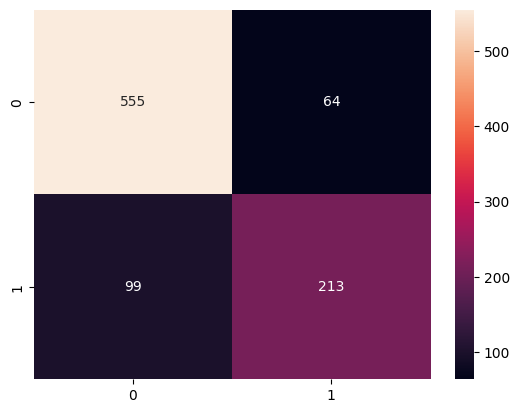

In [22]:
sns.heatmap(cm, annot=True, fmt=',.0f')

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [24]:
param_grid = {'n_estimators':[5, 10, 15, 20, 25, 30, 50, 100, 200, 400]}

In [25]:
kfold = KFold(n_splits=5)

In [26]:
grid = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=kfold, scoring='accuracy')

In [27]:
grid.fit(xtrain, ytrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=0),
             param_grid={'n_estimators': [5, 10, 15, 20, 25, 30, 50, 100, 200,
                                          400]},
             scoring='accuracy')

In [28]:
result = grid.cv_results_

In [29]:
resultdf = pd.DataFrame(result)

In [30]:
resultdf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.047375,0.001685,0.006831,0.000351,5,{'n_estimators': 5},0.812081,0.814765,0.823925,0.795699,0.813172,0.811928,0.009132,10
1,0.066649,0.002269,0.005857,0.000875,10,{'n_estimators': 10},0.817450,0.828188,0.836022,0.805108,0.814516,0.820257,0.010787,9
2,0.080669,0.004781,0.006213,0.000868,15,{'n_estimators': 15},0.824161,0.844295,0.836022,0.814516,0.811828,0.826164,0.012419,5
3,0.122794,0.018292,0.010231,0.002508,20,{'n_estimators': 20},0.824161,0.834899,0.833333,0.813172,0.811828,0.823479,0.009695,8
4,0.146222,0.017456,0.008610,0.001017,25,{'n_estimators': 25},0.828188,0.833557,0.841398,0.818548,0.814516,0.827241,0.009785,2
5,0.162295,0.009604,0.010146,0.003091,30,{'n_estimators': 30},0.826846,0.829530,0.840054,0.826613,0.813172,0.827243,0.008578,1
6,0.279769,0.058797,0.014623,0.003048,50,{'n_estimators': 50},0.826846,0.833557,0.833333,0.822581,0.814516,0.826167,0.007142,4
7,0.428601,0.074309,0.017708,0.001357,100,{'n_estimators': 100},0.830872,0.828188,0.841398,0.817204,0.817204,0.826973,0.009117,3
8,0.692041,0.066934,0.036337,0.005853,200,{'n_estimators': 200},0.828188,0.824161,0.841398,0.813172,0.814516,0.824287,0.010267,7
9,1.453662,0.083523,0.070526,0.013657,400,{'n_estimators': 400},0.832215,0.830872,0.841398,0.810484,0.814516,0.825897,0.011593,6


In [31]:
best_n = grid.best_params_
best_n

{'n_estimators': 30}

<Axes: xlabel='param_n_estimators', ylabel='mean_test_score'>

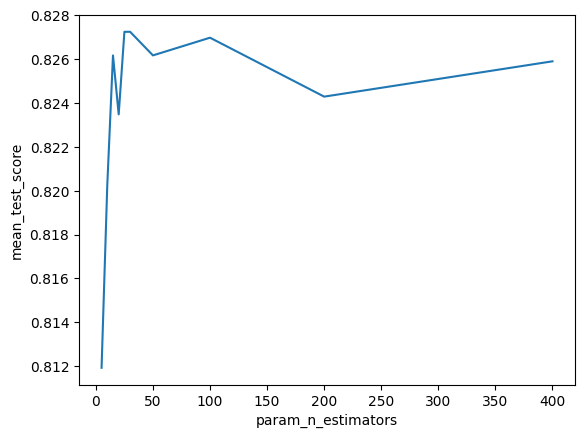

In [32]:
sns.lineplot(x='param_n_estimators', y='mean_test_score', data=resultdf)

In [33]:
clfbest = RandomForestClassifier(n_estimators=best_n['n_estimators'], random_state=0)

In [34]:
clfbest.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=30, random_state=0)

In [35]:
bestpredict = clfbest.predict(xtest)

In [36]:
print(accuracy_score(ytest,bestpredict))

0.8152524167561761


<Axes: >

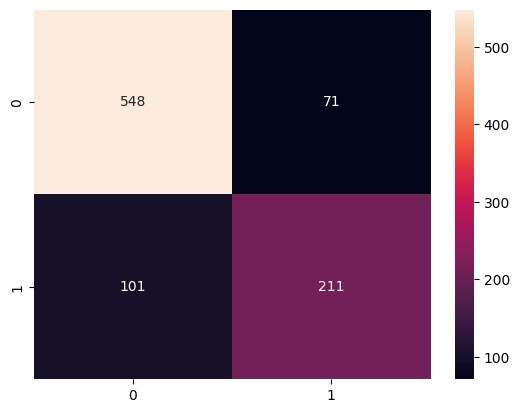

In [37]:
cm = confusion_matrix(ytest, bestpredict)
sns.heatmap(cm, annot=True, fmt=',.0f')

In [38]:
df['Duration'] = 2023-df['JoiningYear']
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Duration
0,0,2017,0,3,34,1,0,0,0,6
1,0,2013,1,1,28,0,0,3,1,10
2,0,2014,2,3,38,0,0,2,0,9
3,1,2016,0,3,27,1,0,5,1,7
4,1,2017,1,3,24,1,1,2,1,6


In [39]:
X = df.drop(['JoiningYear','LeaveOrNot'],axis=1)
Y = df['LeaveOrNot']

In [40]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2,random_state=0)
print(Xtrain.shape, Xtest.shape)

(3722, 8) (931, 8)


In [41]:
clfbest.fit(Xtrain,Ytrain)
bestpredict2 = clfbest.predict(Xtest)
print(accuracy_score(Ytest,bestpredict2))

0.8088077336197637


In [42]:
from xgboost import XGBClassifier

In [43]:
xgb = XGBClassifier(random_state=0)

In [44]:
param_gridXG = {'n_estimators':[5, 10, 15, 20, 25, 30, 45, 40, 50]}

In [45]:
grid2 = GridSearchCV(xgb, param_gridXG, cv=kfold, scoring='accuracy')

In [46]:
grid2.fit(xtrain, ytrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'n_estimators': [5, 10, 15, 20, 25, 30, 45, 40, 50]},
             scoring='accuracy')

In [47]:
result = grid2.cv_results_
resultdf2 = pd.DataFrame(result)
resultdf2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020262,0.003815,0.005481,0.000683,5,{'n_estimators': 5},0.840268,0.879195,0.844086,0.836022,0.844086,0.848731,0.015520,5
1,0.021608,0.001636,0.004663,0.000378,10,{'n_estimators': 10},0.848322,0.877852,0.864247,0.842742,0.838710,0.854375,0.014601,1
2,0.026692,0.001969,0.005118,0.000429,15,{'n_estimators': 15},0.841611,0.881879,0.860215,0.831989,0.830645,0.849268,0.019428,4
3,0.031449,0.002003,0.004924,0.000586,20,{'n_estimators': 20},0.844295,0.876510,0.853495,0.831989,0.833333,0.847925,0.016298,8
4,0.038740,0.001523,0.005461,0.000429,25,{'n_estimators': 25},0.848322,0.876510,0.853495,0.829301,0.836022,0.848730,0.016331,6
5,0.044335,0.001790,0.005594,0.000484,30,{'n_estimators': 30},0.845638,0.879195,0.856183,0.830645,0.836022,0.849536,0.017196,3
6,0.059135,0.003287,0.005260,0.000189,45,{'n_estimators': 45},0.849664,0.875168,0.856183,0.830645,0.837366,0.849805,0.015529,2
7,0.048528,0.002012,0.005230,0.000645,40,{'n_estimators': 40},0.845638,0.875168,0.854839,0.829301,0.836022,0.848193,0.016021,7
8,0.055825,0.001451,0.005080,0.000881,50,{'n_estimators': 50},0.842953,0.876510,0.853495,0.826613,0.833333,0.846581,0.017498,9


In [48]:
best_n = grid2.best_params_
best_n

{'n_estimators': 10}

<Axes: xlabel='param_n_estimators', ylabel='mean_test_score'>

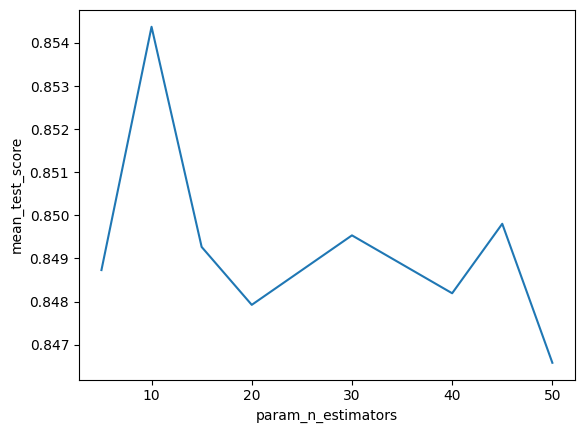

In [49]:
sns.lineplot(x='param_n_estimators', y='mean_test_score', data=resultdf2)

In [50]:
xgbbest = XGBClassifier(n_estimators=best_n['n_estimators'], random_state=0)
xgbbest.fit(Xtrain,Ytrain)
bestpredict = xgbbest.predict(Xtest)
print(accuracy_score(Ytest,bestpredict))

0.849624060150376


In [51]:
xgbbest = XGBClassifier(n_estimators=best_n['n_estimators'], random_state=0)
xgbbest.fit(xtrain,ytrain)
bestpredict = xgbbest.predict(xtest)
print(accuracy_score(ytest,bestpredict))

0.849624060150376


<Axes: >

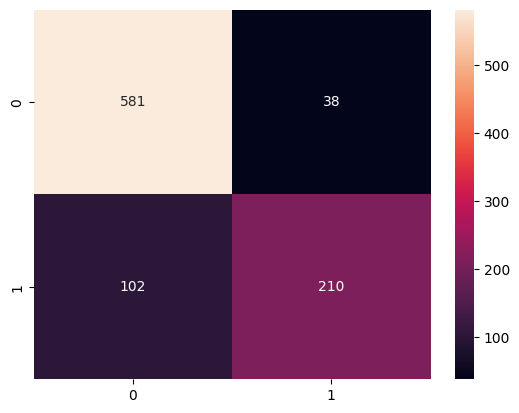

In [53]:
cm = confusion_matrix(Ytest, bestpredict)
sns.heatmap(cm, annot=True, fmt=',.0f',xticklabels=True,yticklabels=True)

In [66]:
xt = {'Education':0,'JoiningYear':2015,'City':1,'PaymentTier':2,'Age':22,'Gender':0,'EverBenched':0,'ExperienceInCurrentDomain':1}
xt = pd.DataFrame([xt])

In [67]:
print(xgbbest.predict(xt))

[1]
